In [1]:
# Import modelflow

%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt

In [4]:
from ipywidgets import interact,Dropdown,Checkbox
from IPython.display import display, clear_output,Latex, Markdown
import pandas as pd

import modelmf
import modeljupyter as mj
from modelvis import waterplot

from modelinvert import targets_instruments
from modelclass import model
model.widescreen()

model.scroll_off()

In [5]:
# Load model and data, and run 

if not 'masia' in locals():
    print('Load model')
    masia,baseline = model.modelload('Asia_sep7.pcim',run=1,silent=1)
from inject import inject
inject(masia)  
masia.lastdf = masia.basedf.copy()

Load model


In [6]:
instruments = [[f'{country}_GCARBR_A' for country in masia.countries_GCARBR_A]]
target_var  = 'WLD_CO2'
delay = 6
target_growth = 1

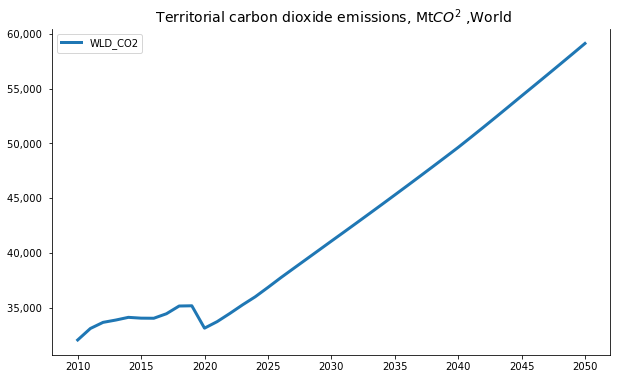

In [7]:
model.plot_basis(target_var,df = masia.basedf.loc[2010:,[target_var]],trans=masia.var_description);

In [8]:
experiment = baseline.copy()
experiment.loc[2022,instruments[0]]= experiment.loc[2022,instruments[0]] + 10 
result = masia(experiment,progressbar = 1)

Solving Asia_7sept:   0%|          | 0/30

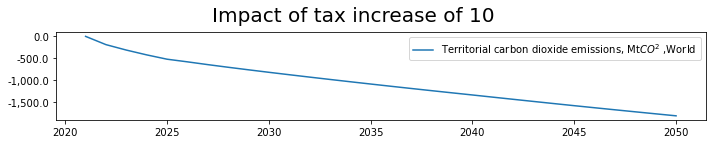

In [9]:
masia[target_var].dif.rename().plot(colrow  = 1,title = 'Impact of tax increase of 10 ',top=0.8);
masia[target_var].dif.df;
    

      Business as usual  Target
2027                NaN     NaN
2028           0.021686    0.01
2029           0.021243    0.01
2030           0.020853    0.01
2031           0.020262    0.01
2032           0.020007    0.01
2033           0.019720    0.01
2034           0.019428    0.01
2035           0.019210    0.01
2036           0.018935    0.01
2037           0.018722    0.01
2038           0.018493    0.01
2039           0.018266    0.01
2040           0.018049    0.01
2041           0.018534    0.01
2042           0.018396    0.01
2043           0.018276    0.01
2044           0.018150    0.01
2045           0.017921    0.01
2046           0.017458    0.01
2047           0.017248    0.01
2048           0.017038    0.01
2049           0.016837    0.01
2050           0.016690    0.01


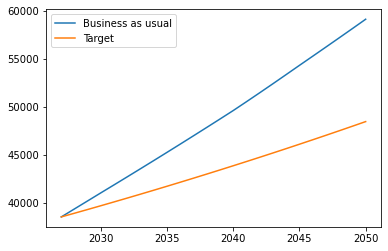

In [10]:
target_before = baseline[[target_var]].loc[2022+delay-1:,:]
target = target_before.mfcalc(f'{target_var} = {target_var}(-1) * (1+{target_growth}/100)')
t = pd.concat([target_before.rename(columns={target_var:'Business as usual'}),target.rename(columns={target_var:'Target'})],axis=1)
t.plot()
print(t.pct_change())

In [11]:
t_i_baseline = baseline.copy()
t_i = targets_instruments(databank=t_i_baseline,targets=target,instruments=instruments,
                          model=masia,DefaultImpuls=50.,defaultconv=100,varimpulse=True,nonlin=True)

In [12]:
t_i.debug=1
res = t_i(delay=delay)

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Distance    :WLD_CO2   -2.113447e-07
Name: 2027, dtype: float64
OrgDistance :WLD_CO2   -2.113447e-07
Name: 2027, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :WLD_CO2   -450.657002
Name: 2028, dtype: float64
OrgDistance :WLD_CO2   -450.657002
Name: 2028, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Instrument_0    0.177925
dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :WLD_CO2    182.697808
Name: 2028, dtype: float64
OrgDistance :WLD_CO2    182.697808
Name: 2028, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Instrument_0   -0.072131
dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :WLD_CO2   -64.285705
Name: 2028, dtype: float64
OrgDistance :WLD_CO2   -64.285705
Name: 2028, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :WLD_CO2   -479.933187
Name: 2029, dtype: float64
OrgDistance :WLD_CO2   -479.933187
Name: 2029, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Instrument_0    0.196789
dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :WLD_CO2    145.602019
Name: 2029, dtype: float64
OrgDistance :WLD_CO2    145.602019
Name: 2029, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Instrument_0   -0.059702
dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :WLD_CO2   -36.144155
Name: 2029, dtype: float64
OrgDistance :WLD_CO2   -36.144155
Name: 2029, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :WLD_CO2   -414.310044
Name: 2030, dtype: float64
OrgDistance :WLD_CO2   -414.310044
Name: 2030, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Instrument_0    0.171272
dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :WLD_CO2    72.957349
Name: 2030, dtype: float64
OrgDistance :WLD_CO2    72.957349
Name: 2030, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :WLD_CO2   -256.43967
Name: 2031, dtype: float64
OrgDistance :WLD_CO2   -256.43967
Name: 2031, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Instrument_0    0.107053
dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :WLD_CO2    15.480578
Name: 2031, dtype: float64
OrgDistance :WLD_CO2    15.480578
Name: 2031, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :WLD_CO2   -295.630038
Name: 2032, dtype: float64
OrgDistance :WLD_CO2   -295.630038
Name: 2032, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Instrument_0    0.124642
dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :WLD_CO2   -4.354221
Name: 2032, dtype: float64
OrgDistance :WLD_CO2   -4.354221
Name: 2032, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :WLD_CO2   -293.916275
Name: 2033, dtype: float64
OrgDistance :WLD_CO2   -293.916275
Name: 2033, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Instrument_0    0.125136
dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :WLD_CO2   -24.495515
Name: 2033, dtype: float64
OrgDistance :WLD_CO2   -24.495515
Name: 2033, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :WLD_CO2   -293.826182
Name: 2034, dtype: float64
OrgDistance :WLD_CO2   -293.826182
Name: 2034, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Instrument_0    0.126066
dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :WLD_CO2   -41.50732
Name: 2034, dtype: float64
OrgDistance :WLD_CO2   -41.50732
Name: 2034, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :WLD_CO2   -294.57715
Name: 2035, dtype: float64
OrgDistance :WLD_CO2   -294.57715
Name: 2035, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Instrument_0    0.127295
dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :WLD_CO2   -56.407518
Name: 2035, dtype: float64
OrgDistance :WLD_CO2   -56.407518
Name: 2035, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :WLD_CO2   -291.766824
Name: 2036, dtype: float64
OrgDistance :WLD_CO2   -291.766824
Name: 2036, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Instrument_0    0.12695
dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :WLD_CO2   -68.679746
Name: 2036, dtype: float64
OrgDistance :WLD_CO2   -68.679746
Name: 2036, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :WLD_CO2   -289.863379
Name: 2037, dtype: float64
OrgDistance :WLD_CO2   -289.863379
Name: 2037, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Instrument_0    0.126956
dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :WLD_CO2   -79.381059
Name: 2037, dtype: float64
OrgDistance :WLD_CO2   -79.381059
Name: 2037, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :WLD_CO2   -286.482639
Name: 2038, dtype: float64
OrgDistance :WLD_CO2   -286.482639
Name: 2038, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Instrument_0    0.126256
dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :WLD_CO2   -88.184036
Name: 2038, dtype: float64
OrgDistance :WLD_CO2   -88.184036
Name: 2038, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :WLD_CO2   -282.012072
Name: 2039, dtype: float64
OrgDistance :WLD_CO2   -282.012072
Name: 2039, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Instrument_0    0.125023
dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :WLD_CO2   -95.303724
Name: 2039, dtype: float64
OrgDistance :WLD_CO2   -95.303724
Name: 2039, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :WLD_CO2   -277.051713
Name: 2040, dtype: float64
OrgDistance :WLD_CO2   -277.051713
Name: 2040, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Instrument_0    0.123534
dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :WLD_CO2   -101.059703
Name: 2040, dtype: float64
OrgDistance :WLD_CO2   -101.059703
Name: 2040, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Instrument_0    0.045061
dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :WLD_CO2   -37.987094
Name: 2040, dtype: float64
OrgDistance :WLD_CO2   -37.987094
Name: 2040, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :WLD_CO2   -231.044272
Name: 2041, dtype: float64
OrgDistance :WLD_CO2   -231.044272
Name: 2041, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Instrument_0    0.103489
dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :WLD_CO2   -91.191029
Name: 2041, dtype: float64
OrgDistance :WLD_CO2   -91.191029
Name: 2041, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :WLD_CO2   -279.689796
Name: 2042, dtype: float64
OrgDistance :WLD_CO2   -279.689796
Name: 2042, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Instrument_0    0.125823
dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :WLD_CO2   -115.991538
Name: 2042, dtype: float64
OrgDistance :WLD_CO2   -115.991538
Name: 2042, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Instrument_0    0.05218
dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :WLD_CO2   -49.192026
Name: 2042, dtype: float64
OrgDistance :WLD_CO2   -49.192026
Name: 2042, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :WLD_CO2   -225.246361
Name: 2043, dtype: float64
OrgDistance :WLD_CO2   -225.246361
Name: 2043, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Instrument_0    0.101756
dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :WLD_CO2   -99.148988
Name: 2043, dtype: float64
OrgDistance :WLD_CO2   -99.148988
Name: 2043, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :WLD_CO2   -272.12799
Name: 2044, dtype: float64
OrgDistance :WLD_CO2   -272.12799
Name: 2044, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Instrument_0    0.123433
dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :WLD_CO2   -124.235241
Name: 2044, dtype: float64
OrgDistance :WLD_CO2   -124.235241
Name: 2044, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Instrument_0    0.056351
dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :WLD_CO2   -57.674744
Name: 2044, dtype: float64
OrgDistance :WLD_CO2   -57.674744
Name: 2044, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :WLD_CO2   -214.786757
Name: 2045, dtype: float64
OrgDistance :WLD_CO2   -214.786757
Name: 2045, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Instrument_0    0.097822
dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :WLD_CO2   -102.629698
Name: 2045, dtype: float64
OrgDistance :WLD_CO2   -102.629698
Name: 2045, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Instrument_0    0.046741
dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :WLD_CO2   -49.610059
Name: 2045, dtype: float64
OrgDistance :WLD_CO2   -49.610059
Name: 2045, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :WLD_CO2   -184.482711
Name: 2046, dtype: float64
OrgDistance :WLD_CO2   -184.482711
Name: 2046, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Instrument_0    0.08439
dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :WLD_CO2   -91.204836
Name: 2046, dtype: float64
OrgDistance :WLD_CO2   -91.204836
Name: 2046, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :WLD_CO2   -221.404531
Name: 2047, dtype: float64
OrgDistance :WLD_CO2   -221.404531
Name: 2047, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Instrument_0    0.101726
dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :WLD_CO2   -111.910219
Name: 2047, dtype: float64
OrgDistance :WLD_CO2   -111.910219
Name: 2047, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Instrument_0    0.051418
dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :WLD_CO2   -57.124646
Name: 2047, dtype: float64
OrgDistance :WLD_CO2   -57.124646
Name: 2047, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :WLD_CO2   -175.549806
Name: 2048, dtype: float64
OrgDistance :WLD_CO2   -175.549806
Name: 2048, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Instrument_0    0.081036
dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :WLD_CO2   -91.321802
Name: 2048, dtype: float64
OrgDistance :WLD_CO2   -91.321802
Name: 2048, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :WLD_CO2   -205.937828
Name: 2049, dtype: float64
OrgDistance :WLD_CO2   -205.937828
Name: 2049, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Instrument_0    0.095529
dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :WLD_CO2   -109.038617
Name: 2049, dtype: float64
OrgDistance :WLD_CO2   -109.038617
Name: 2049, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Instrument_0    0.05058
dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :WLD_CO2   -58.177604
Name: 2049, dtype: float64
OrgDistance :WLD_CO2   -58.177604
Name: 2049, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :WLD_CO2   -165.087589
Name: 2050, dtype: float64
OrgDistance :WLD_CO2   -165.087589
Name: 2050, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Instrument_0    0.076959
dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :WLD_CO2   -89.455
Name: 2050, dtype: float64
OrgDistance :WLD_CO2   -89.455
Name: 2050, dtype: float64


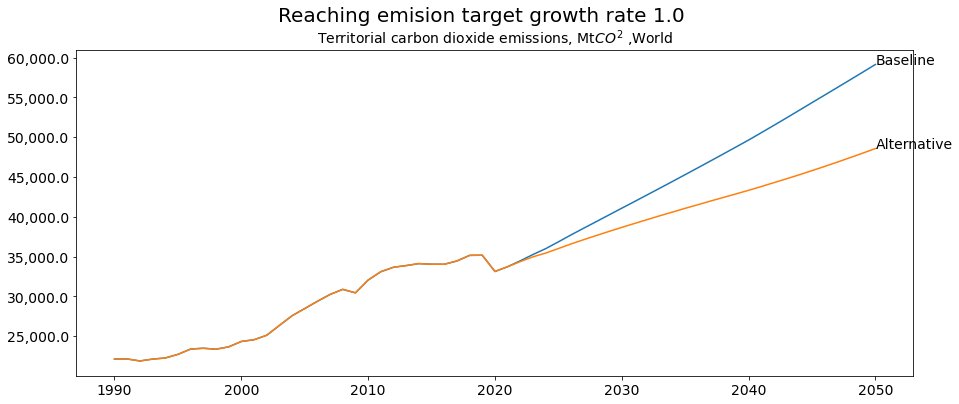

In [26]:
with masia.set_smpl(1990,2050):

    masia['wld_co2'].rename().plot_alt(title=f'Reaching emision target growth rate {target_growth:,.1f}');

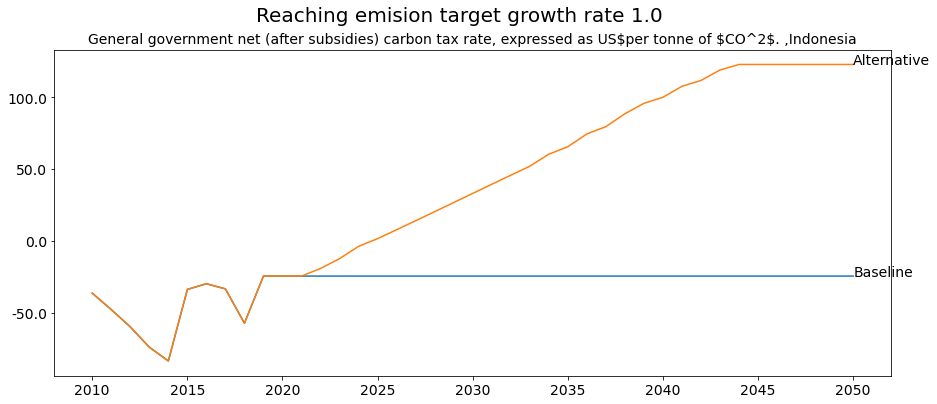

In [25]:
with masia.set_smpl(1990,2050):
    masia['IDN_GCARBR'].rename().plot_alt(title=f'Reaching emision target growth rate {target_growth:,.1f}');

In [22]:
masia['IDN_share*'].df

,IDN_SHAREE,IDN_SHAREE_A,IDN_SHAREH,IDN_SHAREH_A,IDN_SHARESP,IDN_SHARESP_A,IDN_SHAREX,IDN_SHAREX_A
2021,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25
2022,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25
2023,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25
2024,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25
2025,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25
2026,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25
2027,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25
2028,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25
2029,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25
2030,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25


# Tax in each country 

In [16]:
masia.exodif().rename(columns=masia.var_description).T

,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,...,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044
"Add factor:General government net (after subsidies) carbon tax rate, expressed as US$per tonne of $CO^2$. ,Afghanistan",5.289676,6.854365,8.563578,5.35264,6.23212,6.25682,6.303312,6.364759,6.347479,6.347805,...,5.174468,8.90015,5.087775,8.98923,7.228171,4.219507,7.657217,4.051797,7.305473,3.847951
"Add factor:General government net (after subsidies) carbon tax rate, expressed as US$per tonne of $CO^2$. ,SubSaharanAfrica",5.289676,6.854365,8.563578,5.35264,6.23212,6.25682,6.303312,6.364759,6.347479,6.347805,...,5.174468,8.90015,5.087775,8.98923,7.228171,4.219507,7.657217,4.051797,7.305473,3.847951
"Add factor:General government net (after subsidies) carbon tax rate, expressed as US$per tonne of $CO^2$. ,Armenia",5.289676,6.854365,8.563578,5.35264,6.23212,6.25682,6.303312,6.364759,6.347479,6.347805,...,5.174468,8.90015,5.087775,8.98923,7.228171,4.219507,7.657217,4.051797,7.305473,3.847951
"Add factor:General government net (after subsidies) carbon tax rate, expressed as US$per tonne of $CO^2$. ,Australia",5.289676,6.854365,8.563578,5.35264,6.23212,6.25682,6.303312,6.364759,6.347479,6.347805,...,5.174468,8.90015,5.087775,8.98923,7.228171,4.219507,7.657217,4.051797,7.305473,3.847951
"Add factor:General government net (after subsidies) carbon tax rate, expressed as US$per tonne of $CO^2$. ,Azerbaijan",5.289676,6.854365,8.563578,5.35264,6.23212,6.25682,6.303312,6.364759,6.347479,6.347805,...,5.174468,8.90015,5.087775,8.98923,7.228171,4.219507,7.657217,4.051797,7.305473,3.847951
"Add factor:General government net (after subsidies) carbon tax rate, expressed as US$per tonne of $CO^2$. ,Bangladesh",5.289676,6.854365,8.563578,5.35264,6.23212,6.25682,6.303312,6.364759,6.347479,6.347805,...,5.174468,8.90015,5.087775,8.98923,7.228171,4.219507,7.657217,4.051797,7.305473,3.847951
"Add factor:General government net (after subsidies) carbon tax rate, expressed as US$per tonne of $CO^2$. ,BruneiDarussalam",5.289676,6.854365,8.563578,5.35264,6.23212,6.25682,6.303312,6.364759,6.347479,6.347805,...,5.174468,8.90015,5.087775,8.98923,7.228171,4.219507,7.657217,4.051797,7.305473,3.847951
"Add factor:General government net (after subsidies) carbon tax rate, expressed as US$per tonne of $CO^2$. ,Bhutan",5.289676,6.854365,8.563578,5.35264,6.23212,6.25682,6.303312,6.364759,6.347479,6.347805,...,5.174468,8.90015,5.087775,8.98923,7.228171,4.219507,7.657217,4.051797,7.305473,3.847951
"Add factor:General government net (after subsidies) carbon tax rate, expressed as US$per tonne of $CO^2$. ,Switzerland",5.289676,6.854365,8.563578,5.35264,6.23212,6.25682,6.303312,6.364759,6.347479,6.347805,...,5.174468,8.90015,5.087775,8.98923,7.228171,4.219507,7.657217,4.051797,7.305473,3.847951
"Add factor:General government net (after subsidies) carbon tax rate, expressed as US$per tonne of $CO^2$. ,China",5.289676,6.854365,8.563578,5.35264,6.23212,6.25682,6.303312,6.364759,6.347479,6.347805,...,5.174468,8.90015,5.087775,8.98923,7.228171,4.219507,7.657217,4.051797,7.305473,3.847951


# World reduction 

# ASEAN reduction

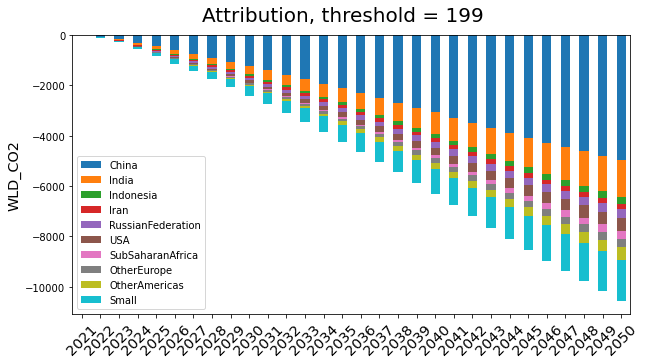

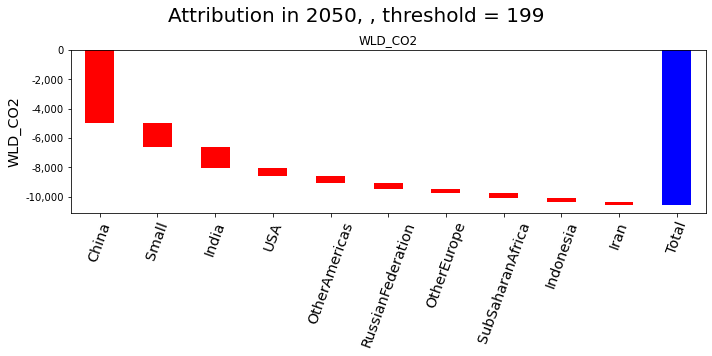

In [17]:

    Threshold =199
    masia.dekomp_plot('WLD_CO2',pct=0,threshold=Threshold,nametrans=masia.country_get)
    masia.dekomp_plot_per('WLD_CO2',pct=0,threshold=Threshold,per=2050,sort=True,nametrans=masia.country_get);


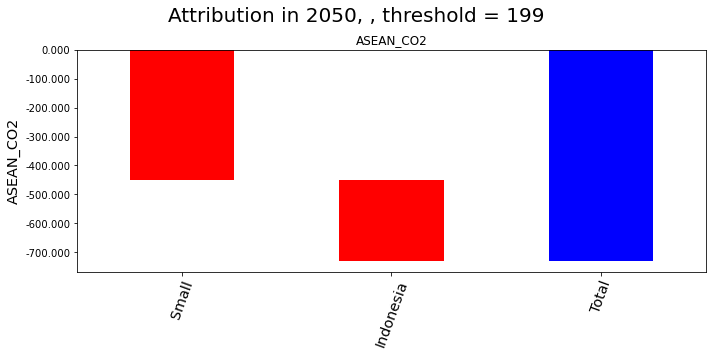

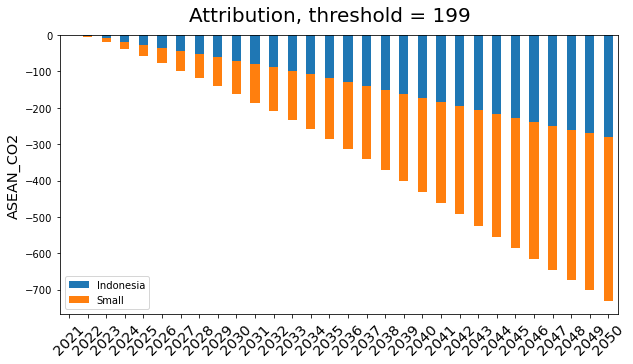

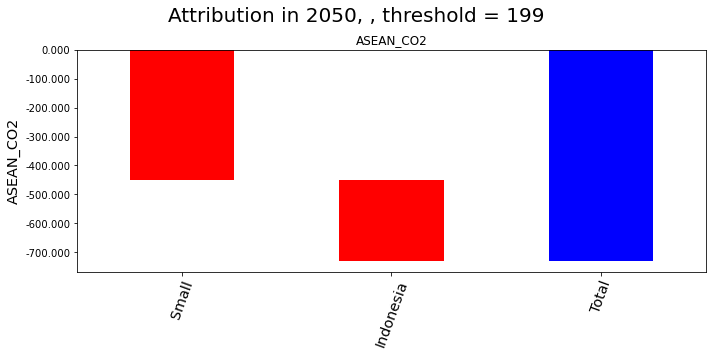

In [18]:
    masia.dekomp_plot('ASEAN_CO2',pct=0,threshold=Threshold,nametrans=masia.country_get)
    masia.dekomp_plot_per('ASEAN_CO2',pct=0,threshold=Threshold,per=2050,sort=True,nametrans=masia.country_get)


# not used  

In [19]:
co2_input_var = [var for var in masia.totgraph.predecessors('WLD_CO2') if var.endswith('CO2')]
co2_input_var_asean = [var for var in masia.totgraph.predecessors('WLD_CO2') if var.endswith('CO2') 
                       and  var.split('_')[0] in masia.countries_ASEAN ]

In [20]:
co2_baseline = baseline.loc[:,co2_input_var].pipe(lambda df:df.rename(columns={c : masia.iso_dict.get(cname := c.split('_')[0],cname) for c in df.columns}))
co2_baseline_asean = baseline.loc[:,co2_input_var_asean].pipe(lambda df:df.rename(columns={c : masia.iso_dict.get(cname := c.split('_')[0],cname) for c in df.columns}))